In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install nltk
%pip install Sastrawi
%pip install wordcloud
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


# Data PreProcessing

In [2]:
import pandas as pd

# df = pd.read_csv('sample_data/the_data_selected.csv', sep=';', encoding='ISO-8859-1')
df = pd.read_csv('sample_data/the_data_selected.csv', sep=',')
my_df = df[['score', 'content']]
my_df.head()

,score,content
0,5,Terima kasih RSUD Kajen yang telah mengangkat ...
1,2,Pelayanan kurang ramah
2,5,Alhamdulillah dn terimakasih IGD walupun ruang...
3,1,Pelayanan untuk pasien BPJS tolong diperbaiki ...
4,1,RSUD di sini ko dari dulu sampai sekarang ga a...


### Menghitung Jumlah Baris

In [3]:
len(my_df.index)

1793

### Menghapus Baris yang Null

In [4]:
my_df = my_df.dropna(subset=['content'])
my_df.isnull().sum()

score      0
content    0
dtype: int64

### Menghitung Jumlah Baris setelah Null Dihilangkan

In [5]:
len(my_df)

1793

## a. Casefolding

Proses casefolding adalah proses mengubah seluruh huruf menjadi kecil.

In [6]:
import re
def clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    my_df[new_text_field_name] = my_df[new_text_field_name].str.replace(r"\d+", "")
    return my_df

In [7]:
my_df['text_clean'] = my_df['content'].str.lower()

In [8]:
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head()

,score,content,text_clean
0,5,Terima kasih RSUD Kajen yang telah mengangkat ...,terima kasih rsud kajen yang telah mengangkat ...
1,2,Pelayanan kurang ramah,pelayanan kurang ramah
2,5,Alhamdulillah dn terimakasih IGD walupun ruang...,alhamdulillah dn terimakasih igd walupun ruang...
3,1,Pelayanan untuk pasien BPJS tolong diperbaiki ...,pelayanan untuk pasien bpjs tolong diperbaiki ...
4,1,RSUD di sini ko dari dulu sampai sekarang ga a...,rsud di sini ko dari dulu sampai sekarang ga a...


## b. Filtering

Filtering Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Stopword biasanya dihilangkan dalam proses pengolahan teks. contoh dalam bahasa Indonesia seperti "dan", "atau", "yang", "di", "dari", "ke", "dengan", "jika", "ketika", "saat", "atau", "tetapi", "karena", "sehingga", "sebelum", "setelah", "agar", "supaya", "serta", "itulah", "yaitu", "misalnya", "contoh", "adalah", "yakni", "dst". Stopword mempunya informasi rencahan yang kecil, sehingga tidak berpengaruh dalam proses klasifikasi.

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('indonesian')
data_clean['text_Stopword'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,score,content,text_clean,text_Stopword
0,5,Terima kasih RSUD Kajen yang telah mengangkat ...,terima kasih rsud kajen yang telah mengangkat ...,terima kasih rsud kajen mengangkat ambeien yg ...
1,2,Pelayanan kurang ramah,pelayanan kurang ramah,pelayanan ramah
2,5,Alhamdulillah dn terimakasih IGD walupun ruang...,alhamdulillah dn terimakasih igd walupun ruang...,alhamdulillah dn terimakasih igd walupun ruang...
3,1,Pelayanan untuk pasien BPJS tolong diperbaiki ...,pelayanan untuk pasien bpjs tolong diperbaiki ...,pelayanan pasien bpjs tolong diperbaiki pasien...
4,1,RSUD di sini ko dari dulu sampai sekarang ga a...,rsud di sini ko dari dulu sampai sekarang ga a...,rsud ko ga perubahan pelayanan buruk orang tua...


## c. Tokenizing

Tokenizing merupakan proses pemisahan text menjadi potongan-potongan yang lebih kecil. Tokenizing dapat dilakukan dengan menggunakan library NLTK.

In [10]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize, sent_tokenize
data_clean['text_tokens'] = data_clean['text_Stopword'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,score,content,text_clean,text_Stopword,text_tokens
0,5,Terima kasih RSUD Kajen yang telah mengangkat ...,terima kasih rsud kajen yang telah mengangkat ...,terima kasih rsud kajen mengangkat ambeien yg ...,"[terima, kasih, rsud, kajen, mengangkat, ambei..."
1,2,Pelayanan kurang ramah,pelayanan kurang ramah,pelayanan ramah,"[pelayanan, ramah]"
2,5,Alhamdulillah dn terimakasih IGD walupun ruang...,alhamdulillah dn terimakasih igd walupun ruang...,alhamdulillah dn terimakasih igd walupun ruang...,"[alhamdulillah, dn, terimakasih, igd, walupun,..."
3,1,Pelayanan untuk pasien BPJS tolong diperbaiki ...,pelayanan untuk pasien bpjs tolong diperbaiki ...,pelayanan pasien bpjs tolong diperbaiki pasien...,"[pelayanan, pasien, bpjs, tolong, diperbaiki, ..."
4,1,RSUD di sini ko dari dulu sampai sekarang ga a...,rsud di sini ko dari dulu sampai sekarang ga a...,rsud ko ga perubahan pelayanan buruk orang tua...,"[rsud, ko, ga, perubahan, pelayanan, buruk, or..."


## d. Stemming

Stemming adalah proses pemetaan dan penguraian bentuk dari kata ke bentuk dasarnya. Stemming dilakukan dengan menghilangkan imbuhan-imbuhan yang terdapat pada kata. Contoh stemming adalah mengubah kata "membaca" menjadi "baca".

In [11]:
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung = 0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung += 1
    print(hitung, ":", term, ":", term_dict[term])

print(term_dict)
print("------------------------")

# Apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_clean['text_tokens_stemmed'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)


2407
------------------------
1 : terima : terima
2 : kasih : kasih
3 : rsud : rsud
4 : kajen : kajen
5 : mengangkat : angkat
6 : ambeien : ambeien
7 : yg : yg
8 : ku : ku
9 : derita : derita
10 : bertehuntahun : bertehuntahun
11 : aman : aman
12 : dony : dony
13 : sungguh : sungguh
14 : engkau : engkau
15 : life : life
16 : saver : saver
17 : terbaikku : baik
18 : umur : umur
19 : senantiasa : senantiasa
20 : diberkahi : kah
21 : kebahagiaan : bahagia
22 : melimpah : limpah
23 : kehidupan : hidup
24 : manapun : mana
25 : diriku : diri
26 : tanggal : tanggal
27 : operasi : operasi
28 : 22 : 22
29 : januari : januari
30 : 2025 : 2025
31 : pelayanan : layan
32 : ramah : ramah
33 : alhamdulillah : alhamdulillah
34 : dn : dn
35 : terimakasih : terimakasih
36 : igd : igd
37 : walupun : walupun
38 : ruangan : ruang
39 : penuh : penuh
40 : ttp : ttp
41 : mengusahakan : usaha
42 : pasiensukses : pasiensukses
43 : pasien : pasien
44 : bpjs : bpjs
45 : tolong : tolong
46 : diperbaiki : baik
47 :

,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed
0,5,Terima kasih RSUD Kajen yang telah mengangkat ...,terima kasih rsud kajen yang telah mengangkat ...,terima kasih rsud kajen mengangkat ambeien yg ...,"[terima, kasih, rsud, kajen, mengangkat, ambei...",terima kasih rsud kajen angkat ambeien yg ku d...
1,2,Pelayanan kurang ramah,pelayanan kurang ramah,pelayanan ramah,"[pelayanan, ramah]",layan ramah
2,5,Alhamdulillah dn terimakasih IGD walupun ruang...,alhamdulillah dn terimakasih igd walupun ruang...,alhamdulillah dn terimakasih igd walupun ruang...,"[alhamdulillah, dn, terimakasih, igd, walupun,...",alhamdulillah dn terimakasih igd walupun ruang...
3,1,Pelayanan untuk pasien BPJS tolong diperbaiki ...,pelayanan untuk pasien bpjs tolong diperbaiki ...,pelayanan pasien bpjs tolong diperbaiki pasien...,"[pelayanan, pasien, bpjs, tolong, diperbaiki, ...",layan pasien bpjs tolong baik pasien bpjs oran...
4,1,RSUD di sini ko dari dulu sampai sekarang ga a...,rsud di sini ko dari dulu sampai sekarang ga a...,rsud ko ga perubahan pelayanan buruk orang tua...,"[rsud, ko, ga, perubahan, pelayanan, buruk, or...",rsud ko ga ubah layan buruk orang tua kasi ben...
5,5,"Terimakasih RSUD kajen, pelayanannya bagus, ce...",terimakasih rsud kajen pelayanannya bagus cepa...,terimakasih rsud kajen pelayanannya bagus cepa...,"[terimakasih, rsud, kajen, pelayanannya, bagus...",terimakasih rsud kajen layan bagus cepat awat ...
6,2,"untuk pelayanan 5/10, kurang komunikatif dan k...",untuk pelayanan 510 kurang komunikatif dan kur...,pelayanan 510 komunikatif sopan untung jajan r...,"[pelayanan, 510, komunikatif, sopan, untung, j...",layan 510 komunikatif sopan untung jajan rs en...
7,5,No review text,no review text,no review text,"[no, review, text]",no review text
8,5,sebulan yg lalu saya dirawat di ruang Alamanda...,sebulan yg lalu saya dirawat di ruang alamanda...,sebulan yg dirawat ruang alamanda rsud kajen a...,"[sebulan, yg, dirawat, ruang, alamanda, rsud, ...",bulan yg rawat ruang alamanda rsud kajen alham...
9,5,Untuk pelayanan baik,untuk pelayanan baik,pelayanan,[pelayanan],layan


In [14]:
data_clean.to_csv('sample_data/the_data_hasiltextpreprocessing.csv', index=False)

# Data Labelling

In [15]:
def pelabelan(skor):
    if skor < 3:
        return 'negatif'
    elif skor == 4:
        return 'positif'
    elif skor == 5:
        return 'positif'
my_df['Label'] = my_df['score'].apply(pelabelan)
my_df = my_df.dropna()

my_df.to_csv('sample_data/the_data_hasillabeling.csv', index=False)

my_df.head()

,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
0,5,Terima kasih RSUD Kajen yang telah mengangkat ...,terima kasih rsud kajen yang telah mengangkat ...,terima kasih rsud kajen mengangkat ambeien yg ...,"[terima, kasih, rsud, kajen, mengangkat, ambei...",terima kasih rsud kajen angkat ambeien yg ku d...,positif
1,2,Pelayanan kurang ramah,pelayanan kurang ramah,pelayanan ramah,"[pelayanan, ramah]",layan ramah,negatif
2,5,Alhamdulillah dn terimakasih IGD walupun ruang...,alhamdulillah dn terimakasih igd walupun ruang...,alhamdulillah dn terimakasih igd walupun ruang...,"[alhamdulillah, dn, terimakasih, igd, walupun,...",alhamdulillah dn terimakasih igd walupun ruang...,positif
3,1,Pelayanan untuk pasien BPJS tolong diperbaiki ...,pelayanan untuk pasien bpjs tolong diperbaiki ...,pelayanan pasien bpjs tolong diperbaiki pasien...,"[pelayanan, pasien, bpjs, tolong, diperbaiki, ...",layan pasien bpjs tolong baik pasien bpjs oran...,negatif
4,1,RSUD di sini ko dari dulu sampai sekarang ga a...,rsud di sini ko dari dulu sampai sekarang ga a...,rsud ko ga perubahan pelayanan buruk orang tua...,"[rsud, ko, ga, perubahan, pelayanan, buruk, or...",rsud ko ga ubah layan buruk orang tua kasi ben...,negatif


### Menampilkan isi Data Hasil Labelling

In [16]:
import pandas as pd
hasillabeling = pd.read_csv('sample_data/the_data_hasillabeling.csv')
pd.set_option('display.max_colwidth', None)
hasillabeling[['content', 'text_clean', 'text_Stopword', 'text_tokens', 'text_tokens_stemmed', 'Label']].head(6)

,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
0,"Terima kasih RSUD Kajen yang telah mengangkat ambeien yg ku derita bertehun-tahun. Dengan sangat aman. Kepada Pak Dony, sungguh engkau “life saver” terbaikku, panjang umur dan senantiasa diberkahi kebahagiaan yang melimpah di kehidupan manapun. Diriku tanggal operasi 22 januari 2025.",terima kasih rsud kajen yang telah mengangkat ambeien yg ku derita bertehuntahun dengan sangat aman kepada pak dony sungguh engkau life saver terbaikku panjang umur dan senantiasa diberkahi kebahagiaan yang melimpah di kehidupan manapun diriku tanggal operasi 22 januari 2025,terima kasih rsud kajen mengangkat ambeien yg ku derita bertehuntahun aman dony sungguh engkau life saver terbaikku umur senantiasa diberkahi kebahagiaan melimpah kehidupan manapun diriku tanggal operasi 22 januari 2025,"['terima', 'kasih', 'rsud', 'kajen', 'mengangkat', 'ambeien', 'yg', 'ku', 'derita', 'bertehuntahun', 'aman', 'dony', 'sungguh', 'engkau', 'life', 'saver', 'terbaikku', 'umur', 'senantiasa', 'diberkahi', 'kebahagiaan', 'melimpah', 'kehidupan', 'manapun', 'diriku', 'tanggal', 'operasi', '22', 'januari', '2025']",terima kasih rsud kajen angkat ambeien yg ku derita bertehuntahun aman dony sungguh engkau life saver baik umur senantiasa kah bahagia limpah hidup mana diri tanggal operasi 22 januari 2025,positif
1,Pelayanan kurang ramah,pelayanan kurang ramah,pelayanan ramah,"['pelayanan', 'ramah']",layan ramah,negatif
2,"Alhamdulillah dn terimakasih IGD walupun ruangan penuh ttp mengusahakan buat pasien,,,sukses selalu",alhamdulillah dn terimakasih igd walupun ruangan penuh ttp mengusahakan buat pasiensukses selalu,alhamdulillah dn terimakasih igd walupun ruangan penuh ttp mengusahakan pasiensukses,"['alhamdulillah', 'dn', 'terimakasih', 'igd', 'walupun', 'ruangan', 'penuh', 'ttp', 'mengusahakan', 'pasiensukses']",alhamdulillah dn terimakasih igd walupun ruang penuh ttp usaha pasiensukses,positif
3,"Pelayanan untuk pasien BPJS tolong diperbaiki lagi pasien BPJS juga orang sakit,",pelayanan untuk pasien bpjs tolong diperbaiki lagi pasien bpjs juga orang sakit,pelayanan pasien bpjs tolong diperbaiki pasien bpjs orang sakit,"['pelayanan', 'pasien', 'bpjs', 'tolong', 'diperbaiki', 'pasien', 'bpjs', 'orang', 'sakit']",layan pasien bpjs tolong baik pasien bpjs orang sakit,negatif
4,"RSUD di sini ko dari dulu sampai sekarang ga ada perubahan. Pelayanan buruk, apalagi ke orang tua kasian sampai di bentak gitu sama cs nya. Terus salah diagnosa lagi :/, orang masuk IGD ga di temui dokternya samsek ? Yang bener aja sampe …",rsud di sini ko dari dulu sampai sekarang ga ada perubahan pelayanan buruk apalagi ke orang tua kasian sampai di bentak gitu sama cs nya terus salah diagnosa lagi orang masuk igd ga di temui dokternya samsek yang bener aja sampe,rsud ko ga perubahan pelayanan buruk orang tua kasian bentak gitu cs nya salah diagnosa orang masuk igd ga temui dokternya samsek bener aja sampe,"['rsud', 'ko', 'ga', 'perubahan', 'pelayanan', 'buruk', 'orang', 'tua', 'kasian', 'bentak', 'gitu', 'cs', 'nya', 'salah', 'diagnosa', 'orang', 'masuk', 'igd', 'ga', 'temui', 'dokternya', 'samsek', 'bener', 'aja', 'sampe']",rsud ko ga ubah layan buruk orang tua kasi bentak gitu cs nya salah diagnosa orang masuk igd ga temu dokter samsek bener aja sampe,negatif
5,"Terimakasih RSUD kajen, pelayanannya bagus, cepat dan perawat IGD nya ramah - ramah, pertahankan ya smoga kedepanya semakin lebih baik lagi",terimakasih rsud kajen pelayanannya bagus cepat dan perawat igd nya ramah ramah pertahankan ya smoga kedepanya semakin lebih baik lagi,terimakasih rsud kajen pelayanannya bagus cepat perawat igd nya ramah ramah pertahankan ya smoga kedepanya,"['terimakasih', 'rsud', 'kajen', 'pelayanannya', 'bagus', 'cepat', 'perawat', 'igd', 'nya', 'ramah', 'ramah', 'pertahankan', 'ya', 'smoga', 'kedepanya']",terimakasih rsud kajen layan bagus cepat awat igd nya ramah ramah tahan ya smoga depa,positif


### Jumlah Label Aktual

In [17]:
len(hasillabeling)

1764

### Jumlah Label Mentah Positif dan Presentase

In [18]:
positive_count = hasillabeling[hasillabeling['Label'] == 'positif'].shape[0]
print(positive_count)

1568


In [19]:
total_count = len(hasillabeling)
positive_percentage = (positive_count / total_count) * 100
print(f"Percentage of positive reviews: {positive_percentage:.2f}%")

Percentage of positive reviews: 88.89%


### Jumlah Label Mentah Negatif dan Presentase

In [20]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
print(negative_count)

196


In [21]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
negative_percentage = (negative_count / total_count) * 100
print(f"Percentage of negative reviews: {negative_percentage:.2f}%")

Percentage of negative reviews: 11.11%


# Data Extracting

In [85]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasillabeling.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Drop Kolom yang Tidak Digunakan

In [86]:
data_clean = data_clean.drop(columns=['score', 'text_clean', 'text_Stopword', 'text_tokens'])

### Setup TFIDF

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

### Menampilkan Jumlah Data Hasil Extracting

In [88]:
print(A.shape)
print(A_tfid.shape)
print(A_fit_tfid.shape)

(1764,)
(1764, 1990)
(1764, 1990)


### Konversi Data Hasil Extracting ke Array

In [89]:
A_tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
print(A_tfid)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10242 stored elements and shape (1764, 1990)>
  Coords	Values
  (0, 22)	0.20654241107921523
  (0, 24)	0.20654241107921523
  (0, 109)	0.18222546870101955
  (0, 111)	0.20654241107921523
  (0, 122)	0.20654241107921523
  (0, 191)	0.20654241107921523
  (0, 194)	0.11811084427665718
  (0, 299)	0.20654241107921523
  (0, 442)	0.20654241107921523
  (0, 474)	0.18814735428887774
  (0, 501)	0.20654241107921523
  (0, 524)	0.20654241107921523
  (0, 614)	0.20654241107921523
  (0, 687)	0.20654241107921523
  (0, 748)	0.19578199265823173
  (0, 750)	0.07261221928523362
  (0, 800)	0.10493617521259889
  (0, 908)	0.17738693586789425
  (0, 988)	0.20654241107921523
  (0, 992)	0.20654241107921523
  (0, 1032)	0.17738693586789425
  (0, 1252)	0.15306999348969857
  (0, 1553)	0.07079832693955147
  (0, 1612)	0.20654241107921523
  (0, 1656)	0.19578199265823173
  :	:
  (1758, 1562)	0.30552450417324184
  (1758, 1579)	0.2974250958715589
  (1759, 1205)	0.577350

# Penerapan Algoritma

## a. Naive Bayes

### 1. Cara Konvensional

In [91]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(A_tfid, B)

MultinomialNB()

In [92]:
B_pred = nb.predict(A_tfid)
data_clean['Label NB'] = B_pred
data_clean = pd.DataFrame(data_clean)
data_clean.to_csv('sample_data/the_data_hasil_sentimen_NB.csv', index=False)

data_clean.head()

,content,text_tokens_stemmed,Label,Label NB
0,"Terima kasih RSUD Kajen yang telah mengangkat ambeien yg ku derita bertehun-tahun. Dengan sangat aman. Kepada Pak Dony, sungguh engkau “life saver” terbaikku, panjang umur dan senantiasa diberkahi kebahagiaan yang melimpah di kehidupan manapun. Diriku tanggal operasi 22 januari 2025.",terima kasih rsud kajen angkat ambeien yg ku derita bertehuntahun aman dony sungguh engkau life saver baik umur senantiasa kah bahagia limpah hidup mana diri tanggal operasi 22 januari 2025,positif,positif
1,Pelayanan kurang ramah,layan ramah,negatif,positif
2,"Alhamdulillah dn terimakasih IGD walupun ruangan penuh ttp mengusahakan buat pasien,,,sukses selalu",alhamdulillah dn terimakasih igd walupun ruang penuh ttp usaha pasiensukses,positif,positif
3,"Pelayanan untuk pasien BPJS tolong diperbaiki lagi pasien BPJS juga orang sakit,",layan pasien bpjs tolong baik pasien bpjs orang sakit,negatif,positif
4,"RSUD di sini ko dari dulu sampai sekarang ga ada perubahan. Pelayanan buruk, apalagi ke orang tua kasian sampai di bentak gitu sama cs nya. Terus salah diagnosa lagi :/, orang masuk IGD ga di temui dokternya samsek ? Yang bener aja sampe …",rsud ko ga ubah layan buruk orang tua kasi bentak gitu cs nya salah diagnosa orang masuk igd ga temu dokter samsek bener aja sampe,negatif,negatif


### 2. Cara Pakai 5K-Fold Cross Validation

In [93]:

from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Inisialisasi model MultinomialNB
model = MultinomialNB()

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B[train_index], B[test_index]

    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label NB Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_NB_average.csv', index=False)


Fold Accuracies: [0.9036827195467422, 0.9008498583569405, 0.9121813031161473, 0.9036827195467422, 0.8806818181818182]
Mean Accuracy: 0.9002156837496781
Standard Deviation of Accuracy: 0.01048037024837566
Overall Accuracy with Average Predictions: 0.9002267573696145


## b. Support Vector Machine (SVM)

### 1. Cara Konvensional

In [94]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

Accuracy for C=0.01: 0.8888888888888888
Accuracy for C=0.05: 0.8945578231292517
Accuracy for C=0.25: 0.9631519274376418
Accuracy for C=0.5: 0.9795918367346939
Accuracy for C=0.75: 0.981859410430839
Accuracy for C=1: 0.9829931972789115


LinearSVC(C=1)

In [95]:
B_pred = svm.predict(A_tfid)
data_clean['Label SVM'] = B_pred
data_clean.to_csv('sample_data/the_data_hasil_sentimen_SVM.csv', index=False)
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM
0,"Terima kasih RSUD Kajen yang telah mengangkat ambeien yg ku derita bertehun-tahun. Dengan sangat aman. Kepada Pak Dony, sungguh engkau “life saver” terbaikku, panjang umur dan senantiasa diberkahi kebahagiaan yang melimpah di kehidupan manapun. Diriku tanggal operasi 22 januari 2025.",terima kasih rsud kajen angkat ambeien yg ku derita bertehuntahun aman dony sungguh engkau life saver baik umur senantiasa kah bahagia limpah hidup mana diri tanggal operasi 22 januari 2025,positif,positif,positif,positif
1,Pelayanan kurang ramah,layan ramah,negatif,positif,positif,positif
2,"Alhamdulillah dn terimakasih IGD walupun ruangan penuh ttp mengusahakan buat pasien,,,sukses selalu",alhamdulillah dn terimakasih igd walupun ruang penuh ttp usaha pasiensukses,positif,positif,positif,positif
3,"Pelayanan untuk pasien BPJS tolong diperbaiki lagi pasien BPJS juga orang sakit,",layan pasien bpjs tolong baik pasien bpjs orang sakit,negatif,positif,positif,negatif
4,"RSUD di sini ko dari dulu sampai sekarang ga ada perubahan. Pelayanan buruk, apalagi ke orang tua kasian sampai di bentak gitu sama cs nya. Terus salah diagnosa lagi :/, orang masuk IGD ga di temui dokternya samsek ? Yang bener aja sampe …",rsud ko ga ubah layan buruk orang tua kasi bentak gitu cs nya salah diagnosa orang masuk igd ga temu dokter samsek bener aja sampe,negatif,negatif,negatif,negatif


### 2. Cara Pakai 5K-Fold Cross Validation

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi model Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42, C = 1.0)

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B[train_index], B[test_index]

    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label SVM Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_SVM_average.csv', index=False)


Fold Accuracies: [0.9320113314447592, 0.9320113314447592, 0.943342776203966, 0.9178470254957507, 0.9318181818181818]
Mean Accuracy: 0.9314061292814835
Standard Deviation of Accuracy: 0.00808993401498617
Overall Accuracy with Average Predictions: 0.93140589569161


In [97]:
data_clean.to_csv('sample_data/the_data_hasil_NB_dan_SVM.csv', index=False)

## C. Neural Network

In [98]:
import numpy as np

# Convert B to 0 for 'negatif' and 1 for 'positif'
B = B.apply(lambda x: 0 if x == 'negatif' else 1)

# Convert B to a 2-dimensional array
B_array = B.values.reshape(-1, 1)
print(B_array)

[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


In [99]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

# Split data menjadi data train dan data test
A_train, A_test, B_train, B_test = train_test_split(A_tfid, B_array, test_size=0.2, random_state=42)

# Inisialisasi model neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(A_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callback untuk menyimpan model dengan akurasi validasi terbaik
checkpoint = ModelCheckpoint('model.h5', save_best_only=True, verbose=0)

# Latih model
print('Mulai training...')
history = model.fit(A_tfid, B_array,
                    epochs=100,
                    validation_data=(A_test, B_test),
                    callbacks=[checkpoint], verbose=0)
print('Training selesai.')

model.load_weights('model.h5')
loss, accuracy = model.evaluate(A_test, B_test)
print('Accuracy:', accuracy)


c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mulai training...


Training selesai.
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9731 - loss: 0.0843 
Accuracy: 0.9830028414726257


### Testing pakai A_test

In [100]:
from sklearn.metrics import accuracy_score

# Predict the labels using the neural network model
B_pred_nn = model.predict(A_test)
B_pred_nn = (B_pred_nn > 0.5).astype(int).flatten()

# Measure the accuracy
accuracy_nn = accuracy_score(B_test, B_pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn:.2f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Neural Network Accuracy: 0.98


In [101]:
from sklearn.metrics import accuracy_score

# Predict the labels using the neural network model
B_pred_nn = model.predict(A_tfid)
B_pred_nn = (B_pred_nn > 0.5).astype(int).flatten()

# Measure the accuracy
accuracy_nn = accuracy_score(B, B_pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn:.2f}")

# Convert the predicted labels to 'positif' and 'negatif'
B_pred_nn = ['positif' if label == 1 else 'negatif' for label in B_pred_nn]

# Add the predicted labels to the data_clean DataFrame
data_clean['Label NN'] = B_pred_nn

# Save the DataFrame to a new CSV file
data_clean.to_csv('sample_data/the_data_hasil_sentimen_NB_SVM_NN.csv', index=False)
data_clean = pd.read_csv('sample_data/the_data_hasil_sentimen_NB_SVM_NN.csv')
# Display the first few rows of the updated DataFrame
data_clean.head()

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network Accuracy: 0.98


,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average,Label NN
0,"Terima kasih RSUD Kajen yang telah mengangkat ambeien yg ku derita bertehun-tahun. Dengan sangat aman. Kepada Pak Dony, sungguh engkau “life saver” terbaikku, panjang umur dan senantiasa diberkahi kebahagiaan yang melimpah di kehidupan manapun. Diriku tanggal operasi 22 januari 2025.",terima kasih rsud kajen angkat ambeien yg ku derita bertehuntahun aman dony sungguh engkau life saver baik umur senantiasa kah bahagia limpah hidup mana diri tanggal operasi 22 januari 2025,positif,positif,positif,positif,positif,positif
1,Pelayanan kurang ramah,layan ramah,negatif,positif,positif,positif,positif,positif
2,"Alhamdulillah dn terimakasih IGD walupun ruangan penuh ttp mengusahakan buat pasien,,,sukses selalu",alhamdulillah dn terimakasih igd walupun ruang penuh ttp usaha pasiensukses,positif,positif,positif,positif,positif,positif
3,"Pelayanan untuk pasien BPJS tolong diperbaiki lagi pasien BPJS juga orang sakit,",layan pasien bpjs tolong baik pasien bpjs orang sakit,negatif,positif,positif,negatif,negatif,negatif
4,"RSUD di sini ko dari dulu sampai sekarang ga ada perubahan. Pelayanan buruk, apalagi ke orang tua kasian sampai di bentak gitu sama cs nya. Terus salah diagnosa lagi :/, orang masuk IGD ga di temui dokternya samsek ? Yang bener aja sampe …",rsud ko ga ubah layan buruk orang tua kasi bentak gitu cs nya salah diagnosa orang masuk igd ga temu dokter samsek bener aja sampe,negatif,negatif,negatif,negatif,negatif,negatif


# Evaluasi Model

In [51]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Menampilkan 5 baris data_clean

In [52]:
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Konsep taman safari dipinggir pantai jadi bisa ada 2 pilihan mau masuk kepantai saja atau liat kebun binatangnya, harus dipertimbangkan lagi tujuan anda kesini karena yang tiket taman safari dan hanya liat pantai beda ya,kalo pengen liat2 …",konsep taman safari pinggir pantai 2 pilih masuk pantai liat kebun binatang timbang tuju kesini tiket taman safari liat pantai beda yakalo ken liat2,positif,positif,positif,positif,positif
1,"Dophinnya bagus, cuman sayang fasilitas tidak sebanding dengan harga tiketnya, masih kena retribusi masuk sebelum ke area wisata, resto hanya ada 1 tempat kecil dan tidak tertata sistem pembeliannya (siapa cepat dapat), kasihan yg nunggu duluan yg bawa anak",dophinnya bagus cuman sayang fasilitas banding harga tiket kena retribusi masuk area wisata resto 1 tata sistem beli cepat kasihan yg nunggu duluan yg bawa anak,negatif,positif,positif,negatif,positif
2,"Senang bisa berkunjung ke safari beach batang... tapi kmrn pas ke sini pas masih ada pembangunan.. hewannya mgkn belum lengkap. Ada pertunjukan hewan2 juga di jam2 tertentu. Bisa naik gajah, unta. tp yg paling menarik pas atraksi lumba2 …",senang kunjung safari beach batang kmrn pas pas bangun hewan mgkn lengkap tunjuk hewan2 jam2 gajah unta tp yg tarik pas atraksi lumba2,positif,positif,positif,positif,positif
3,Tempat masih harus dibenahi,benah,positif,positif,positif,positif,positif
4,"Jelek, becek , g jls",jelek becek g jls,negatif,positif,positif,negatif,positif


### Menghitung Jumlah Baris data_clean

In [53]:
len(data_clean)

891

### Setup TFIDF

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

## a1. k-fold Cross Validation NB

In [55]:
# a1. k-fold Cross Validation NB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")


Akurasi setiap fold: [0.89385475 0.8988764  0.8988764  0.8988764  0.8988764 ]
Rata-rata akurasi: 0.897872073316176
Standar deviasi: 0.002008662356412039
Akurasi tertinggi: 0.898876404494382
Akurasi terendah: 0.8938547486033519
Waktu eksekusi: 0.897872073316176


## a2. k-fold Cross Validation SVM

In [56]:
# a2. k-fold Cross Validation SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

Accuracy for C=0.01: 0.8978675645342312
Accuracy for C=0.05: 0.8978675645342312
Accuracy for C=0.25: 0.9259259259259259
Accuracy for C=0.5: 0.9809203142536476
Accuracy for C=0.75: 0.98989898989899
Accuracy for C=1: 0.9932659932659933
Akurasi setiap fold: [0.89944134 0.91011236 0.92134831 0.89325843 0.8988764 ]
Rata-rata akurasi: 0.90460736928002
Standar deviasi: 0.009988938559893872
Akurasi tertinggi: 0.9213483146067416
Akurasi terendah: 0.8932584269662921
Waktu eksekusi: 0.90460736928002


## b1. Metriks NB

In [57]:
# b1. Metriks NB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

Accuracy score: 0.9012345679012346
Precision score: 0.9110221332443554
Recall score: 0.9012345679012346
F1 score: 0.8575783945015232
confusion matrix:
[[  3  88]
 [  0 800]]

              precision    recall  f1-score   support

     negatif       1.00      0.03      0.06        91
     positif       0.90      1.00      0.95       800

    accuracy                           0.90       891
   macro avg       0.95      0.52      0.51       891
weighted avg       0.91      0.90      0.86       891



## b2. Metriks SVM

In [58]:
# b2. Metriks SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Accuracy score: 0.9932659932659933
Precision score: 0.9932423104493786
Recall score: 0.9932659932659933
F1 score: 0.9931987267861067
confusion matrix:
[[ 86   5]
 [  1 799]]

              precision    recall  f1-score   support

     negatif       0.99      0.95      0.97        91
     positif       0.99      1.00      1.00       800

    accuracy                           0.99       891
   macro avg       0.99      0.97      0.98       891
weighted avg       0.99      0.99      0.99       891



# Analisis dan Perbandingan Hasil

## a. Perbandingan Akurasi

In [59]:
print(f"Rata-rata akurasi NB (K-Fold Cross Validation): {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Rata-rata akurasi SVM (K-Fold Cross Validation): {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

# Metriks NB
print("")
print("Metriks NB")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

# Metriks SVM
print("")
print("Metriks SVM")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Rata-rata akurasi NB (K-Fold Cross Validation): 0.897872073316176
Rata-rata akurasi SVM (K-Fold Cross Validation): 0.90460736928002

Metriks NB
Accuracy score: 0.9012345679012346
Precision score: 0.9110221332443554
Recall score: 0.9012345679012346
F1 score: 0.8575783945015232
confusion matrix:
[[  3  88]
 [  0 800]]

              precision    recall  f1-score   support

     negatif       1.00      0.03      0.06        91
     positif       0.90      1.00      0.95       800

    accuracy                           0.90       891
   macro avg       0.95      0.52      0.51       891
weighted avg       0.91      0.90      0.86       891


Metriks SVM
Accuracy score: 0.9932659932659933
Precision score: 0.9932423104493786
Recall score: 0.9932659932659933
F1 score: 0.9931987267861067
confusion matrix:
[[ 86   5]
 [  1 799]]

              precision    recall  f1-score   support

     negatif       0.99      0.95      0.97        91
     positif       0.99      1.00      1.00       800

  

## b. Interpretasi Hasil

Berikut adalah interpretasi hasil yang dapat dijelaskan berdasarkan data yang diberikan:

1. Analisis Performa Naive Bayes (NB)
Naive Bayes adalah algoritma berbasis probabilitas yang mengasumsikan bahwa setiap fitur bersifat independen. Karena asumsi ini, NB bekerja sangat baik pada dataset yang memiliki fitur sederhana dan distribusi data yang sesuai dengan asumsi independensi.

Akurasi rata-rata: 0.8797 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9324), menunjukkan kinerja yang cukup stabil.
Confusion Matrix:
False Positive (FP): 58 ulasan negatif salah diklasifikasikan sebagai negatif.
False Negative (FN): 128 ulasan negatif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.96, artinya model mampu memprediksi ulasan positif dengan baik, meskipun ada beberapa kesalahan.
Recall (Negatif): 0.95, menunjukkan bahwa sebagian besar ulasan negatif terdeteksi dengan benar.
Kelemahan NB
Asumsi independensi antar fitur bisa menjadi terlalu sederhana, terutama jika fitur ulasan memiliki korelasi yang tinggi.
Rentan terhadap misclassifikasi, 
Misclassifikasi adalah kesalahan dalam pengklasifikasian data, yaitu ketika model prediksi salah menentukan label suatu data. Contohnya:

False Positive (FP): Data negatif diprediksi sebagai positif.
False Negative (FN): Data positif diprediksi sebagai negatif.
Ini mencerminkan ketidakakuratan model dalam memisahkan kelas dengan benar.

Kelebihan NB
Algoritma yang cepat dan efisien, terutama untuk dataset besar.
Sangat cocok untuk data teks, seperti ulasan, karena bekerja dengan representasi berbasis frekuensi seperti bag-of-words atau TF-IDF.
Namun, pada kasus ini, akurasi rata-rata NB lebih rendah dibandingkan SVM. Hal ini mungkin disebabkan oleh asumsi independensi fitur yang tidak sepenuhnya berlaku, sehingga NB kehilangan sensitivitas terhadap pola-pola kompleks dalam ulasan.

2. Analisis Performa Support Vector Machine (SVM)
SVM adalah algoritma pembelajaran mesin yang bekerja dengan cara mencari hyperplane terbaik untuk memisahkan data ke dalam kelas-kelas yang berbeda. SVM dikenal sangat baik dalam menangani data berdimensi tinggi dan non-linear, terutama dengan kernel yang sesuai.

Akurasi rata-rata: 0.8579 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9785), menunjukkan performa yang baik secara konsisten.
Confusion Matrix:
False Positive (FP): 24 ulasan negatif salah diklasifikasikan sebagai positif.
False Negative (FN): 35 ulasan positif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.98, menunjukkan model sangat andal dalam memprediksi ulasan positif.
Recall (Negatif): 0.98, artinya sebagian besar ulasan negatif teridentifikasi dengan benar.
Kelebihan SVM
SVM lebih robust terhadap pola-pola yang kompleks karena menggunakan margin optimal untuk memisahkan data.
Lebih tahan terhadap overfitting, terutama ketika kernel yang digunakan sesuai.
Kelemahan SVM
Proses pelatihan lebih lama dibandingkan NB, terutama pada dataset besar.
Kurang cocok jika data memiliki banyak noise atau tidak terpisahkan secara linear.

3. Perbandingan Akurasi
Perbedaan rata-rata akurasi antara NB (0.8797) dan SVM (0.8579) pada K-Fold Cross Validation cukup kecil, tetapi pada data uji, akurasi SVM (0.9785) jauh lebih tinggi dibandingkan NB (0.9324). Hal ini menunjukkan bahwa SVM mampu memanfaatkan pola-pola yang lebih kompleks dalam ulasan, sehingga memberikan hasil yang lebih akurat.

Mengapa SVM Lebih Akurat?

Kemampuan menangkap pola kompleks: SVM menggunakan hyperplane untuk memisahkan kelas yang mungkin tidak linear, sementara NB hanya menggunakan probabilitas berdasarkan fitur independen.
Penanganan outlier: Margin SVM yang optimal membantu mengurangi pengaruh data outlier, sedangkan NB lebih rentan terhadap kesalahan ini.
Penggunaan kernel: Jika kernel yang digunakan sesuai (seperti RBF atau linear), SVM dapat bekerja sangat baik pada data yang tidak terdistribusi secara normal.
Mengapa NB Masih Kompetitif?

Meski akurasinya lebih rendah, NB tetap memberikan hasil yang cepat dan efisien karena kesederhanaannya.
NB memiliki trade-off performa yang baik, terutama jika dataset tidak memiliki pola kompleks atau berisi banyak noise.


# Kesimpulan

Naive Bayes bekerja baik untuk ulasan yang memiliki pola sederhana dan independen antar fitur. Namun, asumsi independensi fitur membuatnya kalah performa dibandingkan SVM pada data ulasan ini.
SVM lebih unggul karena mampu menangkap pola kompleks antar fitur dan lebih robust terhadap outlier. Namun, ini datang dengan biaya komputasi yang lebih tinggi.
Perbedaan Akurasi:
Perbedaan akurasi mungkin muncul karena NB kesulitan menangani korelasi antar fitur dalam ulasan, sementara SVM dapat memisahkan kelas secara lebih presisi.

### Menampilkan 5 baris my_df

In [60]:
my_df = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
my_df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Konsep taman safari dipinggir pantai jadi bisa ada 2 pilihan mau masuk kepantai saja atau liat kebun binatangnya, harus dipertimbangkan lagi tujuan anda kesini karena yang tiket taman safari dan hanya liat pantai beda ya,kalo pengen liat2 …",konsep taman safari pinggir pantai 2 pilih masuk pantai liat kebun binatang timbang tuju kesini tiket taman safari liat pantai beda yakalo ken liat2,positif,positif,positif,positif,positif
1,"Dophinnya bagus, cuman sayang fasilitas tidak sebanding dengan harga tiketnya, masih kena retribusi masuk sebelum ke area wisata, resto hanya ada 1 tempat kecil dan tidak tertata sistem pembeliannya (siapa cepat dapat), kasihan yg nunggu duluan yg bawa anak",dophinnya bagus cuman sayang fasilitas banding harga tiket kena retribusi masuk area wisata resto 1 tata sistem beli cepat kasihan yg nunggu duluan yg bawa anak,negatif,positif,positif,negatif,positif
2,"Senang bisa berkunjung ke safari beach batang... tapi kmrn pas ke sini pas masih ada pembangunan.. hewannya mgkn belum lengkap. Ada pertunjukan hewan2 juga di jam2 tertentu. Bisa naik gajah, unta. tp yg paling menarik pas atraksi lumba2 …",senang kunjung safari beach batang kmrn pas pas bangun hewan mgkn lengkap tunjuk hewan2 jam2 gajah unta tp yg tarik pas atraksi lumba2,positif,positif,positif,positif,positif
3,Tempat masih harus dibenahi,benah,positif,positif,positif,positif,positif
4,"Jelek, becek , g jls",jelek becek g jls,negatif,positif,positif,negatif,positif


### Memberikan Informasi my_df

In [61]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   content              891 non-null    object
 1   text_tokens_stemmed  884 non-null    object
 2   Label                891 non-null    object
 3   Label NB             891 non-null    object
 4   Label NB Average     891 non-null    object
 5   Label SVM            891 non-null    object
 6   Label SVM Average    891 non-null    object
dtypes: object(7)
memory usage: 48.9+ KB


### Mengecek Missing Value

In [62]:
my_df.isna()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False


In [63]:
my_df.isna().any()

content                False
text_tokens_stemmed     True
Label                  False
Label NB               False
Label NB Average       False
Label SVM              False
Label SVM Average      False
dtype: bool

### Mendeskripsikan my_df

In [64]:
my_df.describe()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
count,891,884,891,891,891,891,891
unique,870,842,2,2,1,2,2
top,Bagus,bagus,positif,positif,positif,positif,positif
freq,7,19,800,888,891,804,884


### Menghitung Jumlah Baris yang memiliki NULL

In [65]:
my_df.isnull().sum()

content                0
text_tokens_stemmed    7
Label                  0
Label NB               0
Label NB Average       0
Label SVM              0
Label SVM Average      0
dtype: int64

# Visualization

In [103]:
import pandas as pd

df = pd.read_csv('sample_data/the_data_hasil_sentimen_NB_SVM_NN.csv')
df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average,Label NN
0,"Terima kasih RSUD Kajen yang telah mengangkat ambeien yg ku derita bertehun-tahun. Dengan sangat aman. Kepada Pak Dony, sungguh engkau “life saver” terbaikku, panjang umur dan senantiasa diberkahi kebahagiaan yang melimpah di kehidupan manapun. Diriku tanggal operasi 22 januari 2025.",terima kasih rsud kajen angkat ambeien yg ku derita bertehuntahun aman dony sungguh engkau life saver baik umur senantiasa kah bahagia limpah hidup mana diri tanggal operasi 22 januari 2025,positif,positif,positif,positif,positif,positif
1,Pelayanan kurang ramah,layan ramah,negatif,positif,positif,positif,positif,positif
2,"Alhamdulillah dn terimakasih IGD walupun ruangan penuh ttp mengusahakan buat pasien,,,sukses selalu",alhamdulillah dn terimakasih igd walupun ruang penuh ttp usaha pasiensukses,positif,positif,positif,positif,positif,positif
3,"Pelayanan untuk pasien BPJS tolong diperbaiki lagi pasien BPJS juga orang sakit,",layan pasien bpjs tolong baik pasien bpjs orang sakit,negatif,positif,positif,negatif,negatif,negatif
4,"RSUD di sini ko dari dulu sampai sekarang ga ada perubahan. Pelayanan buruk, apalagi ke orang tua kasian sampai di bentak gitu sama cs nya. Terus salah diagnosa lagi :/, orang masuk IGD ga di temui dokternya samsek ? Yang bener aja sampe …",rsud ko ga ubah layan buruk orang tua kasi bentak gitu cs nya salah diagnosa orang masuk igd ga temu dokter samsek bener aja sampe,negatif,negatif,negatif,negatif,negatif,negatif


### Menghitung Jumlah Baris df

In [104]:
len(df)

1764

## Wordcloud Klasifikasi Sentimen Semua

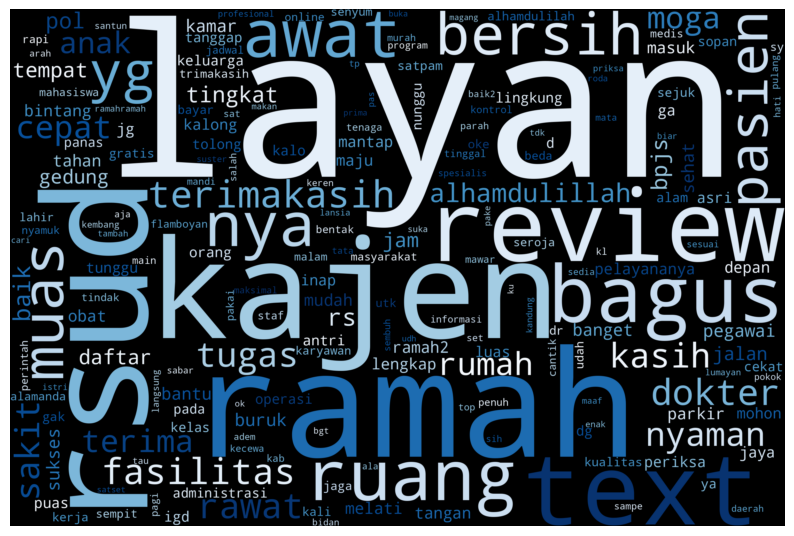

In [105]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# # Filter data untuk hanya menyertakan tweet positif
# netral_tweets = my_df[my_df['Label'] == 'None']

# # Gabungkan semua kata dalam kolom 'full_text' dari tweet positif menjadi satu string
# netral_words = ' '.join([tweets for tweets in netral_tweets['content']])

# Gabungkan semua kata dalam kolom 'full_text' menjadi satu string
all_words = ' '.join([tweets for tweets in df['text_tokens_stemmed'].fillna('')])

# Buat wordcloud untuk kata-kata positif
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(all_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Positif NB

### 1. Naive Bayes

#### Menghitung Jumlah Baris Positif

In [113]:
df[df['Label NB Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average,Label NN
0,"Terima kasih RSUD Kajen yang telah mengangkat ambeien yg ku derita bertehun-tahun. Dengan sangat aman. Kepada Pak Dony, sungguh engkau “life saver” terbaikku, panjang umur dan senantiasa diberkahi kebahagiaan yang melimpah di kehidupan manapun. Diriku tanggal operasi 22 januari 2025.",terima kasih rsud kajen angkat ambeien yg ku derita bertehuntahun aman dony sungguh engkau life saver baik umur senantiasa kah bahagia limpah hidup mana diri tanggal operasi 22 januari 2025,positif,positif,positif,positif,positif,positif
1,Pelayanan kurang ramah,layan ramah,negatif,positif,positif,positif,positif,positif
2,"Alhamdulillah dn terimakasih IGD walupun ruangan penuh ttp mengusahakan buat pasien,,,sukses selalu",alhamdulillah dn terimakasih igd walupun ruang penuh ttp usaha pasiensukses,positif,positif,positif,positif,positif,positif
3,"Pelayanan untuk pasien BPJS tolong diperbaiki lagi pasien BPJS juga orang sakit,",layan pasien bpjs tolong baik pasien bpjs orang sakit,negatif,positif,positif,negatif,negatif,negatif
5,"Terimakasih RSUD kajen, pelayanannya bagus, cepat dan perawat IGD nya ramah - ramah, pertahankan ya smoga kedepanya semakin lebih baik lagi",terimakasih rsud kajen layan bagus cepat awat igd nya ramah ramah tahan ya smoga depa,positif,positif,positif,positif,positif,positif


In [114]:
len(df[df['Label NB Average'] == 'positif'])

1742

#### Penerapan Wordcloud

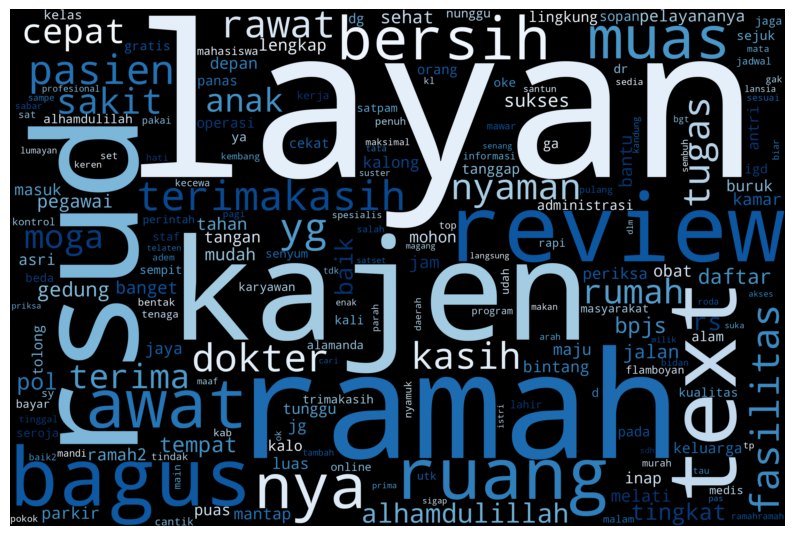

In [115]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')
    plt.show()

netral_tweets = df[df['Label NB Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])


wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

### 2. SVM

#### Menghitung Jumlah Baris Positif

In [116]:
df[df['Label SVM Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average,Label NN
0,"Terima kasih RSUD Kajen yang telah mengangkat ambeien yg ku derita bertehun-tahun. Dengan sangat aman. Kepada Pak Dony, sungguh engkau “life saver” terbaikku, panjang umur dan senantiasa diberkahi kebahagiaan yang melimpah di kehidupan manapun. Diriku tanggal operasi 22 januari 2025.",terima kasih rsud kajen angkat ambeien yg ku derita bertehuntahun aman dony sungguh engkau life saver baik umur senantiasa kah bahagia limpah hidup mana diri tanggal operasi 22 januari 2025,positif,positif,positif,positif,positif,positif
1,Pelayanan kurang ramah,layan ramah,negatif,positif,positif,positif,positif,positif
2,"Alhamdulillah dn terimakasih IGD walupun ruangan penuh ttp mengusahakan buat pasien,,,sukses selalu",alhamdulillah dn terimakasih igd walupun ruang penuh ttp usaha pasiensukses,positif,positif,positif,positif,positif,positif
5,"Terimakasih RSUD kajen, pelayanannya bagus, cepat dan perawat IGD nya ramah - ramah, pertahankan ya smoga kedepanya semakin lebih baik lagi",terimakasih rsud kajen layan bagus cepat awat igd nya ramah ramah tahan ya smoga depa,positif,positif,positif,positif,positif,positif
6,"untuk pelayanan 5/10, kurang komunikatif dan kurang sopan🙏 untung jajan depan rs enak""😔✌️ infus habis saat minta tolong untuk diganti, beberapa dokter dan perawat terlihat memutar mata malas padahal itu sudah job desk mereka🙏 semoga bisa dievaluasi untuk hal pelayanan. terimakasih. …",layan 510 komunikatif sopan untung jajan rs enak infus habis tolong ganti dokter awat putar mata malas job desk moga evaluasi layan terimakasih,negatif,positif,positif,negatif,positif,negatif


In [117]:
len(df[df['Label SVM Average'] == 'positif'])

1669

#### Penerapan Wordcloud

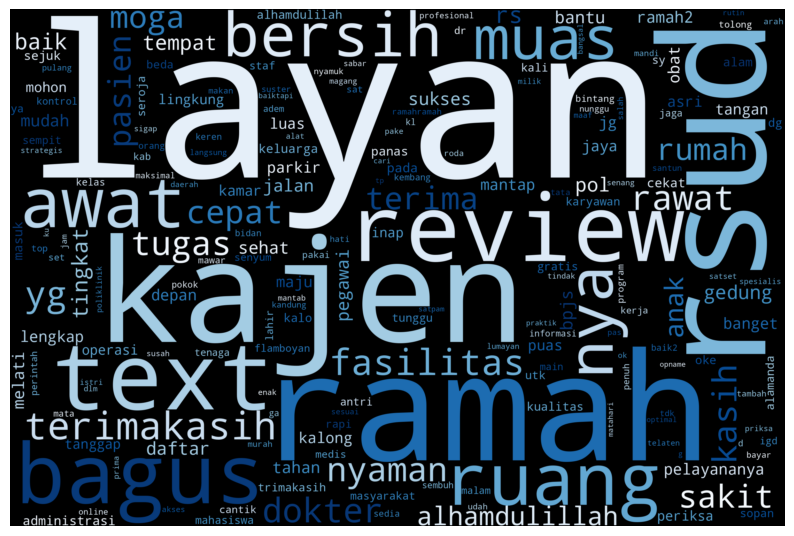

In [118]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')


    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

### 3. Neural Network

#### Menghitung Jumlah Baris Positif

In [119]:
df[df['Label NN'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average,Label NN
0,"Terima kasih RSUD Kajen yang telah mengangkat ambeien yg ku derita bertehun-tahun. Dengan sangat aman. Kepada Pak Dony, sungguh engkau “life saver” terbaikku, panjang umur dan senantiasa diberkahi kebahagiaan yang melimpah di kehidupan manapun. Diriku tanggal operasi 22 januari 2025.",terima kasih rsud kajen angkat ambeien yg ku derita bertehuntahun aman dony sungguh engkau life saver baik umur senantiasa kah bahagia limpah hidup mana diri tanggal operasi 22 januari 2025,positif,positif,positif,positif,positif,positif
1,Pelayanan kurang ramah,layan ramah,negatif,positif,positif,positif,positif,positif
2,"Alhamdulillah dn terimakasih IGD walupun ruangan penuh ttp mengusahakan buat pasien,,,sukses selalu",alhamdulillah dn terimakasih igd walupun ruang penuh ttp usaha pasiensukses,positif,positif,positif,positif,positif,positif
5,"Terimakasih RSUD kajen, pelayanannya bagus, cepat dan perawat IGD nya ramah - ramah, pertahankan ya smoga kedepanya semakin lebih baik lagi",terimakasih rsud kajen layan bagus cepat awat igd nya ramah ramah tahan ya smoga depa,positif,positif,positif,positif,positif,positif
7,No review text,no review text,positif,positif,positif,positif,positif,positif


In [120]:
len(df[df['Label NN'] == 'positif'])

1596

#### Penerapan Wordcloud

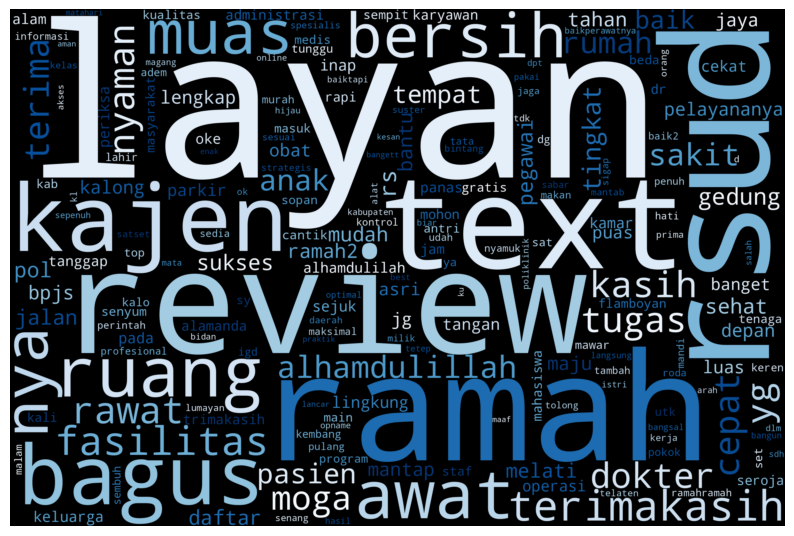

In [121]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')
    plt.show()

netral_tweets = df[df['Label NN'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])


wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Negatif

### 1. Naive Bayes

#### Menghitung Jumlah Baris Negatif

In [122]:
df[df['Label NB Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average,Label NN
4,"RSUD di sini ko dari dulu sampai sekarang ga ada perubahan. Pelayanan buruk, apalagi ke orang tua kasian sampai di bentak gitu sama cs nya. Terus salah diagnosa lagi :/, orang masuk IGD ga di temui dokternya samsek ? Yang bener aja sampe …",rsud ko ga ubah layan buruk orang tua kasi bentak gitu cs nya salah diagnosa orang masuk igd ga temu dokter samsek bener aja sampe,negatif,negatif,negatif,negatif,negatif,negatif
42,"Ini bintang 1 jg kebagusan si. Kl bs gk usah ad bintang. Sy ad alesan knp rs ini gak worth!!\n1. Sy prnah kecelakaan yg menyebabkan luka sobek dibagian kaki, dithn 2020. Trs …",bintang 1 jg bagus si kl bs gk ad bintang sy ad alesan knp rs gak worth1 sy prnah celaka yg sebab luka sobek bagi kaki dithn 2020 trs,negatif,negatif,negatif,negatif,positif,negatif
53,"PELAYANAN BURUK ADE SAYA KEJANG2 GAK DIDAHULUKAN DAHULU, AKHIRNYA TIDAK JADI KESITU PALING BURUK PELAYANANNYA BINTANG 0😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡 …",layan buruk ade kejang2 gak dahulu kesitu buruk layan bintang 0,negatif,negatif,negatif,negatif,negatif,negatif
270,"Pelayanan sangat buruk dan sangat meremehkan nyawa manusia, dari jam 11 malam nunggu di pindah dari ruang mawar ke ICU sampai jam 2 malem tidak ada tindakan , dan akhir nya bapak saya meninggal dunia.",layan buruk remeh nyawa manusia jam 11 malam nunggu pindah ruang mawar icu jam 2 malem tindak nya tinggal dunia,negatif,negatif,negatif,negatif,negatif,negatif
371,"Pas di ponek perawat&bidan galak2 sekali judes jutek,org sakit malah dibentak2,pas udh pindah kamar ,kamarnya ada tikus dan banyak nyamuk, yg jaga pasien yg takut tikus jerit2 akhirnya mengganggu kenyamanan,padahal ini kamar kelas 1 dan bayar full tidak pakai BPJS",pas ponek perawatbidan galak2 judes jutekorg sakit dibentak2pas udh pindah kamar kamar tikus nyamuk yg jaga pasien yg takut tikus jerit2 ganggu kenyamananpadahal kamar kelas 1 bayar full pakai bpjs,negatif,negatif,negatif,negatif,negatif,negatif


In [123]:
len(df[df['Label NB Average'] == 'negatif'])

22

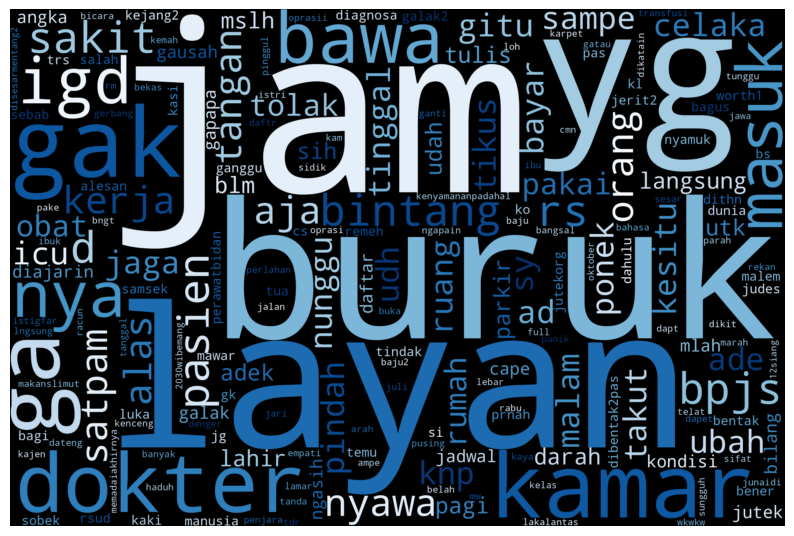

In [124]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label NB Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

### 2. SVM

#### Menghitung Jumlah Baris Negatif

In [125]:
df[df['Label SVM Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average,Label NN
3,"Pelayanan untuk pasien BPJS tolong diperbaiki lagi pasien BPJS juga orang sakit,",layan pasien bpjs tolong baik pasien bpjs orang sakit,negatif,positif,positif,negatif,negatif,negatif
4,"RSUD di sini ko dari dulu sampai sekarang ga ada perubahan. Pelayanan buruk, apalagi ke orang tua kasian sampai di bentak gitu sama cs nya. Terus salah diagnosa lagi :/, orang masuk IGD ga di temui dokternya samsek ? Yang bener aja sampe …",rsud ko ga ubah layan buruk orang tua kasi bentak gitu cs nya salah diagnosa orang masuk igd ga temu dokter samsek bener aja sampe,negatif,negatif,negatif,negatif,negatif,negatif
53,"PELAYANAN BURUK ADE SAYA KEJANG2 GAK DIDAHULUKAN DAHULU, AKHIRNYA TIDAK JADI KESITU PALING BURUK PELAYANANNYA BINTANG 0😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡 …",layan buruk ade kejang2 gak dahulu kesitu buruk layan bintang 0,negatif,negatif,negatif,negatif,negatif,negatif
123,"Mohon untuk Pelayanan BPJS di perbaiki lagi\nMasak masuk ruang igd harus nunggu mau mati dulu kan kocak , padahal si pasien udah pucat hedeeehh pelayanan masih kacau",mohon layan bpjs baik lagimasak masuk ruang igd nunggu mati kocak si pasien udah pucat hedeeehh layan kacau,negatif,negatif,positif,negatif,negatif,negatif
134,"Pelayanan buruk ,\nSama tukang palkir belum 6 jam lebih di minta lebih",layan buruk tukang palkir 6 jam,negatif,negatif,positif,negatif,negatif,negatif


In [126]:
len(df[df['Label SVM Average'] == 'negatif'])

95

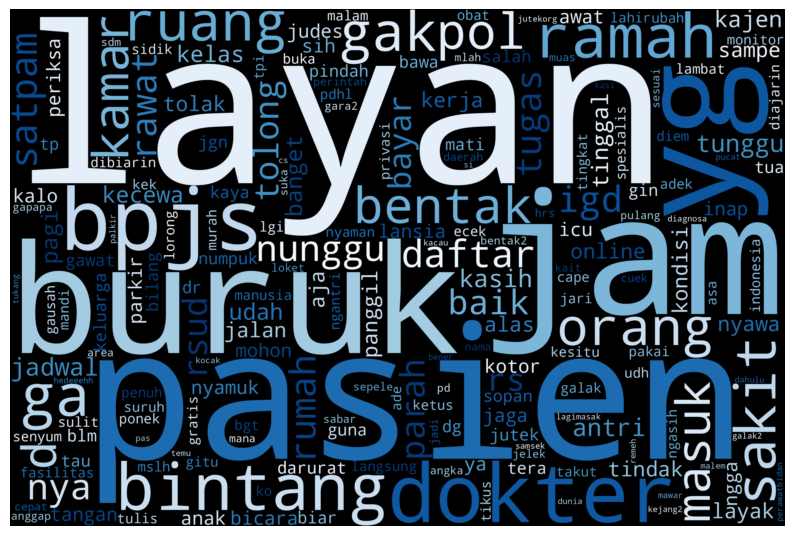

In [127]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

### 3. Neural Network

#### Menghitung Jumlah Baris Negatif

In [128]:
df[df['Label NN'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average,Label NN
3,"Pelayanan untuk pasien BPJS tolong diperbaiki lagi pasien BPJS juga orang sakit,",layan pasien bpjs tolong baik pasien bpjs orang sakit,negatif,positif,positif,negatif,negatif,negatif
4,"RSUD di sini ko dari dulu sampai sekarang ga ada perubahan. Pelayanan buruk, apalagi ke orang tua kasian sampai di bentak gitu sama cs nya. Terus salah diagnosa lagi :/, orang masuk IGD ga di temui dokternya samsek ? Yang bener aja sampe …",rsud ko ga ubah layan buruk orang tua kasi bentak gitu cs nya salah diagnosa orang masuk igd ga temu dokter samsek bener aja sampe,negatif,negatif,negatif,negatif,negatif,negatif
6,"untuk pelayanan 5/10, kurang komunikatif dan kurang sopan🙏 untung jajan depan rs enak""😔✌️ infus habis saat minta tolong untuk diganti, beberapa dokter dan perawat terlihat memutar mata malas padahal itu sudah job desk mereka🙏 semoga bisa dievaluasi untuk hal pelayanan. terimakasih. …",layan 510 komunikatif sopan untung jajan rs enak infus habis tolong ganti dokter awat putar mata malas job desk moga evaluasi layan terimakasih,negatif,positif,positif,negatif,positif,negatif
42,"Ini bintang 1 jg kebagusan si. Kl bs gk usah ad bintang. Sy ad alesan knp rs ini gak worth!!\n1. Sy prnah kecelakaan yg menyebabkan luka sobek dibagian kaki, dithn 2020. Trs …",bintang 1 jg bagus si kl bs gk ad bintang sy ad alesan knp rs gak worth1 sy prnah celaka yg sebab luka sobek bagi kaki dithn 2020 trs,negatif,negatif,negatif,negatif,positif,negatif
51,"Pelayanan lama, kalau memang ada jadwal op bisa konfirmasikan dulu jelasnya ke pasien"" lain, atau tambah personil dokternya sekalian. Jadwal kontrol harus rutin 1 minggu sekali tapi pelayanan lama buat apa? Bukanya membaik malah makin drop pasiennya. Cari solusi jangan cuma baca + reply jawaban saja.",layan jadwal op konfirmasi pasien personil dokter jadwal kontrol rutin 1 minggu layan buka baik drop pasien cari solusi baca reply,negatif,negatif,positif,negatif,positif,negatif


In [129]:
len(df[df['Label NN'] == 'negatif'])

168

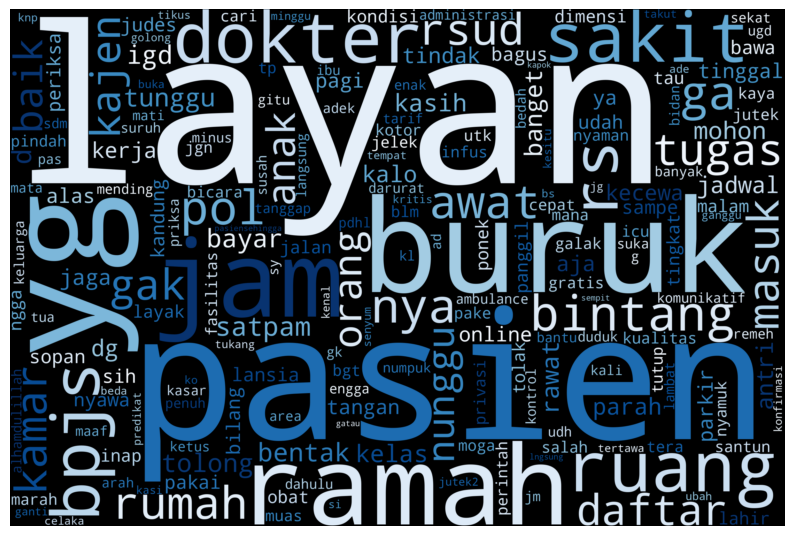

In [130]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label NN'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)